In [21]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score


In [23]:
# Loading the dataset
dataset = pd.read_csv('C:/Users/divaa/Downloads/Social_Network_Ads.csv')

# Displaying the first few rows of the dataset
print(dataset.head())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [25]:
# Selecting relevant features (Age, EstimatedSalary) and target (Purchased)
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values


In [27]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [29]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
# Training the SVM classifier
model = SVC(kernel='linear')  # Using a linear kernel
model.fit(X_train, y_train)


SVC(kernel='linear')

In [50]:
# Making predictions on the test set
y_pred = model.predict(X_test)


In [52]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 93.75%
Confusion Matrix:
[[55  3]
 [ 2 20]]


In [35]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to the training data
smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Training the model with the resampled data
model = SVC(kernel='rbf')
model.fit(X_res, y_res)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after SMOTE: {accuracy * 100:.2f}%")


Accuracy after SMOTE: 95.00%


In [37]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")

print(conf_matrix)


Accuracy: 95.00%
Confusion Matrix:
[[55  3]
 [ 1 21]]


## Taking user input for Age and EstimatedSalary
age = float(input("Enter age: "))
salary = float(input("Enter estimated salary: "))

# Scaling the input data
user_input = scaler.transform([[age, salary]])

# Making prediction
prediction = model.predict(user_input)

# Displaying the result
if prediction == 1:
    print("Prediction: Purchase will be made.")
else:
    print("Prediction: No purchase will be made.")


C:\Users\divaa\AppData\Local\Temp\ipykernel_22316\350850842.py:47: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', marker='x', label='Test Data')


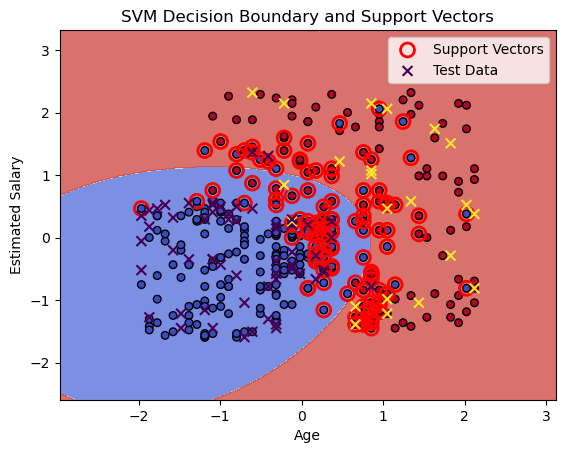

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv('C:/Users/divaa/Downloads/Social_Network_Ads.csv')

# Selecting relevant features (Age, EstimatedSalary) and target (Purchased)
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with RBF kernel
model = SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train, y_train)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class labels for all points in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)

# Plotting the points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, edgecolor='k', cmap=plt.cm.coolwarm)

# Plotting the support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='red', linewidth=2, label="Support Vectors")

# Plotting the margin lines
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', marker='x', label='Test Data')

plt.title('SVM Decision Boundary and Support Vectors')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[55  3]
 [ 2 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.87      0.91      0.89        22

    accuracy                           0.94        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80



In [75]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv('C:/Users/divaa/Downloads/Social_Network_Ads.csv')

# Selecting relevant features (Age, EstimatedSalary) and target (Purchased)
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with RBF kernel
model = SVC(kernel='rbf', C=1, gamma=0.1, probability=True)  # Enable probability estimation
model.fit(X_train, y_train)

# Function to predict purchase
def predict_purchase(age, salary):
    # Scale the input using the same scaler
    input_scaled = scaler.transform([[age, salary]])
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]  # Get the probability of class 1 (Purchased)
    
    # Display prediction and probability
    if prediction == 1:
        print(f"Prediction: Likely to Purchase (Confidence: {probability*100:.2f}%)")
    else:
        print(f"Prediction: Unlikely to Purchase (Confidence: {(1-probability)*100:.2f}%)")

# Example usage
age_input = float(input("Enter Age: "))
salary_input = float(input("Enter Estimated Salary: "))
predict_purchase(age_input, salary_input)


Enter Age:  19
Enter Estimated Salary:  70000


Prediction: Unlikely to Purchase (Confidence: 96.39%)
